<a href="https://colab.research.google.com/github/Elvillano3005/Algoritmos-optimizacion/blob/main/som_tsp_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Self-Organizing Map para TSP
Este notebook implementa una red de tipo SOM para resolver el problema del viajero (TSP).

## Introducción
El **Problema del Viajante (TSP, Traveling Salesman Problem)** consiste en encontrar la ruta más corta que permite a un viajante visitar un conjunto de ciudades exactamente una vez y regresar al punto de partida. Este problema es de tipo NP-difícil y tiene aplicaciones prácticas en logística, planificación de rutas, diseño de circuitos, entre otros.

Para abordar este problema, en este notebook se utiliza una red neuronal no supervisada conocida como **Self-Organizing Map (SOM)**. Los SOM, propuestos por Teuvo Kohonen, son útiles para representar estructuras topológicas de datos en espacios de menor dimensión, y se han adaptado para resolver problemas de optimización como el TSP.

##  ¿Qué son los archivos `.tsp`?
Los archivos `.tsp` forman parte de la **TSPLIB**, una biblioteca de problemas estándar para TSP. Cada archivo describe las coordenadas (x, y) de un conjunto de ciudades, que se utilizan para construir la instancia del problema.

##  Implementación del código

###  Carga de archivos
Se cargan manualmente los archivos necesarios usando `files.upload()` desde Google Colab. Luego, se verifica la existencia de los módulos auxiliares:

- `neuron.py`: define la estructura de las neuronas del SOM.
- `distance.py`: calcula distancias entre ciudades y neuronas.
- `plot.py`: genera visualizaciones del mapa de ciudades y la ruta calculada.
- `io_helper.py`: se encarga de leer los archivos `.tsp` y procesar sus datos.

In [1]:
from google.colab import files

uploaded = files.upload()


Saving distance.py to distance.py
Saving io_helper.py to io_helper.py
Saving main.py to main.py
Saving neuron.py to neuron.py
Saving plot.py to plot.py


In [2]:
import os

required_files = ["neuron.py", "distance.py", "plot.py", "io_helper.py"]
for file in required_files:
    print(f"{file}: {'✅' if os.path.exists(file) else '❌ NO encontrado'}")


neuron.py: ✅
distance.py: ✅
plot.py: ✅
io_helper.py: ✅


### `Main.py`
Este es el archivo principal que ejecuta el proceso completo. Su objetivo es:

- Leer el archivo `.tsp` usando `read_tsp()`.

- Normalizar las coordenadas.

- Generar una red de neuronas.

- Ejecutar el algoritmo SOM durante un número de iteraciones.

- Generar visualizaciones y calcular la longitud de la ruta final.

###io_helper.py
- Contiene funciones para trabajar con archivos .tsp y normalizar datos.

- `read_tsp(filename)`: Lee archivos en formato .tsp (usado por la biblioteca TSPLIB), extrayendo las coordenadas de las ciudades.

- `normalize(points)`: Normaliza las coordenadas de las ciudades para que estén en el intervalo
[
0
,
1
]
[0,1], manteniendo proporciones.



### distance.py
- Define funciones auxiliares para cálculos de distancia.

- `select_closest(candidates, origin)`: Devuelve el índice del punto más cercano.

- `euclidean_distance(a, b)`: Calcula la distancia euclidiana entre arrays de puntos.

- `route_distance(cities)`: Calcula la distancia total de una ruta cerrada.

###neuron.py
- Contiene funciones relacionadas con la red neuronal (el mapa autoorganizado).

- `generate_network(size)`: Crea una red de neuronas con posiciones aleatorias en 2D.

- `get_neighborhood(center, radix, domain)`: Devuelve una distribución gaussiana centrada en la neurona ganadora, usada para actualizar la red.

- `get_route(cities, network)`: Asocia ciudades con neuronas y genera una ruta ordenada.

###plot.py
- Contiene funciones para visualizar el progreso y el resultado del algoritmo.

- `plot_network(cities, neurons, name)`: Muestra las ciudades y la red de neuronas en una imagen.

- `plot_route(cities, route, name)`: Muestra la ruta final encontrada por el SOM.

In [3]:
import numpy as np
from neuron import generate_network, get_neighborhood, get_route
from distance import select_closest, euclidean_distance, route_distance
from plot import plot_network, plot_route
from io_helper import read_tsp, normalize
import matplotlib.pyplot as plt


# Imprementacion

In [4]:
def som(problem, iterations, learning_rate=0.8):
    """Solve the TSP using a Self-Organizing Map."""
    cities = problem.copy()
    cities[['x', 'y']] = normalize(cities[['x', 'y']])
    n = cities.shape[0] * 8
    network = generate_network(n)
    print('Network of {} neurons created. Starting the iterations:'.format(n))

    for i in range(iterations):
        if not i % 100:
            print('\t> Iteration {}/{}'.format(i, iterations), end="\r")
        city = cities.sample(1)[['x', 'y']].values
        winner_idx = select_closest(network, city)
        gaussian = get_neighborhood(winner_idx, n//10, network.shape[0])
        network += gaussian[:,np.newaxis] * learning_rate * (city - network)
        learning_rate = learning_rate * 0.99997
        n = n * 0.9997
        if not i % 1000:
            plot_network(cities, network, name='diagrams/{:05d}.png'.format(i))
        if n < 1 or learning_rate < 0.001:
            print('Decay finalizado en iteración', i)
            break
    else:
        print('Completadas {} iteraciones.'.format(iterations))
    plot_network(cities, network, name='diagrams/final.png')
    route = get_route(cities, network)
    plot_route(cities, route, 'diagrams/route.png')
    plt.show()
    return route


###Se carga el archivo `.tsp`

In [6]:
filename = "ca4663.tsp"
problem = read_tsp(filename)

route = som(problem, 100000)

problem = problem.reindex(route)
distance = route_distance(problem)

print('Route found of length {}'.format(distance))


Problem with 4663 cities read.
Network of 37304 neurons created. Starting the iterations:


/content/plot.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  axis.plot(neurons[:,0], neurons[:,1], 'r.', ls='-', color='#0063ba', markersize=2)


/content/plot.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  axis.plot(neurons[:,0], neurons[:,1], 'r.', ls='-', color='#0063ba', markersize=2)


/content/plot.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  axis.plot(neurons[:,0], neurons[:,1], 'r.', ls='-', color='#0063ba', markersize=2)


/content/plot.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  axis.plot(neurons[:,0], neurons[:,1], 'r.', ls='-', color='#0063ba', markersize=2)


/content/plot.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  axis.plot(neurons[:,0], neurons[:,1], 'r.', ls='-', color='#0063ba', markersize=2)


/content/plot.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  axis.plot(neurons[:,0], neurons[:,1], 'r.', ls='-', color='#0063ba', markersize=2)


/content/plot.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  axis.plot(neurons[:,0], neurons[:,1], 'r.', ls='-', color='#0063ba', markersize=2)


/content/plot.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  axis.plot(neurons[:,0], neurons[:,1], 'r.', ls='-', color='#0063ba', markersize=2)


/content/plot.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  axis.plot(neurons[:,0], neurons[:,1], 'r.', ls='-', color='#0063ba', markersize=2)


/content/plot.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  axis.plot(neurons[:,0], neurons[:,1], 'r.', ls='-', color='#0063ba', markersize=2)


/content/plot.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  axis.plot(neurons[:,0], neurons[:,1], 'r.', ls='-', color='#0063ba', markersize=2)


/content/plot.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  axis.plot(neurons[:,0], neurons[:,1], 'r.', ls='-', color='#0063ba', markersize=2)


/content/plot.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  axis.plot(neurons[:,0], neurons[:,1], 'r.', ls='-', color='#0063ba', markersize=2)


/content/plot.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  axis.plot(neurons[:,0], neurons[:,1], 'r.', ls='-', color='#0063ba', markersize=2)


/content/plot.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  axis.plot(neurons[:,0], neurons[:,1], 'r.', ls='-', color='#0063ba', markersize=2)


/content/plot.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  axis.plot(neurons[:,0], neurons[:,1], 'r.', ls='-', color='#0063ba', markersize=2)


/content/plot.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  axis.plot(neurons[:,0], neurons[:,1], 'r.', ls='-', color='#0063ba', markersize=2)


/content/plot.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  axis.plot(neurons[:,0], neurons[:,1], 'r.', ls='-', color='#0063ba', markersize=2)


/content/plot.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  axis.plot(neurons[:,0], neurons[:,1], 'r.', ls='-', color='#0063ba', markersize=2)


/content/plot.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  axis.plot(neurons[:,0], neurons[:,1], 'r.', ls='-', color='#0063ba', markersize=2)


/content/plot.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  axis.plot(neurons[:,0], neurons[:,1], 'r.', ls='-', color='#0063ba', markersize=2)


/content/plot.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  axis.plot(neurons[:,0], neurons[:,1], 'r.', ls='-', color='#0063ba', markersize=2)


/content/plot.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  axis.plot(neurons[:,0], neurons[:,1], 'r.', ls='-', color='#0063ba', markersize=2)


/content/plot.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  axis.plot(neurons[:,0], neurons[:,1], 'r.', ls='-', color='#0063ba', markersize=2)


/content/plot.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  axis.plot(neurons[:,0], neurons[:,1], 'r.', ls='-', color='#0063ba', markersize=2)


/content/plot.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  axis.plot(neurons[:,0], neurons[:,1], 'r.', ls='-', color='#0063ba', markersize=2)


/content/plot.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  axis.plot(neurons[:,0], neurons[:,1], 'r.', ls='-', color='#0063ba', markersize=2)


/content/plot.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  axis.plot(neurons[:,0], neurons[:,1], 'r.', ls='-', color='#0063ba', markersize=2)


/content/plot.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  axis.plot(neurons[:,0], neurons[:,1], 'r.', ls='-', color='#0063ba', markersize=2)


/content/plot.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  axis.plot(neurons[:,0], neurons[:,1], 'r.', ls='-', color='#0063ba', markersize=2)


/content/plot.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  axis.plot(neurons[:,0], neurons[:,1], 'r.', ls='-', color='#0063ba', markersize=2)


/content/plot.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  axis.plot(neurons[:,0], neurons[:,1], 'r.', ls='-', color='#0063ba', markersize=2)


/content/plot.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  axis.plot(neurons[:,0], neurons[:,1], 'r.', ls='-', color='#0063ba', markersize=2)


/content/plot.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  axis.plot(neurons[:,0], neurons[:,1], 'r.', ls='-', color='#0063ba', markersize=2)


/content/plot.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  axis.plot(neurons[:,0], neurons[:,1], 'r.', ls='-', color='#0063ba', markersize=2)


/content/plot.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  axis.plot(neurons[:,0], neurons[:,1], 'r.', ls='-', color='#0063ba', markersize=2)


Decay finalizado en iteración 35084


/content/plot.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  axis.plot(neurons[:,0], neurons[:,1], 'r.', ls='-', color='#0063ba', markersize=2)


Route found of length 1491684.5156227215


###   Visualización de Resultados
Al finalizar el entrenamiento, se visualiza el recorrido obtenido con las neuronas sobre el mapa de ciudades. Esta visualización permite comparar la solución aproximada generada por el SOM con la distribución real de las ciudades.

# Resultados

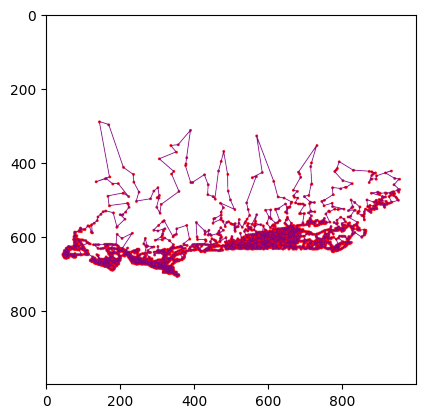

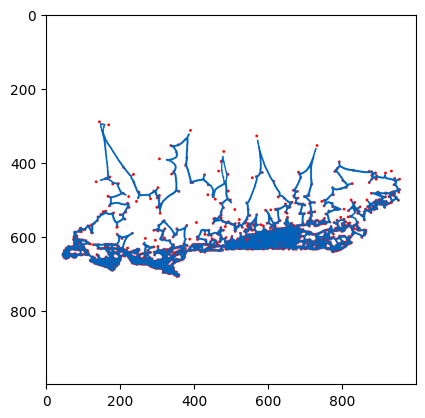

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpgimg

image_path = 'diagrams/route.png'
image = mpgimg.imread(image_path)
image_path2 = 'diagrams/final.png'
image2 = mpgimg.imread(image_path2)

plt.imshow(image)
plt.show()
plt.imshow(image2)
plt.show()

##  Conclusiones
- El enfoque con SOM para resolver el TSP es una solución heurística efectiva y visualmente intuitiva.
- Aunque no garantiza la mejor ruta posible, ofrece una buena aproximación con menor costo computacional.
- Es importante ajustar correctamente los parámetros del SOM para obtener buenos resultados.